In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

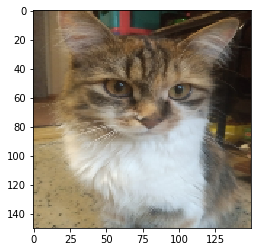

In [3]:
image_file_name = 'cat.jpg'
img = tf.keras.preprocessing.image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

In [4]:
###Convert a photo to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [7]:
###Download the CNN trained model
###Loading network architecture data from json file
json_file = open("cats_vs_dogs_cnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
###Create a model based on loaded data
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
###Load weights into the model
loaded_model.load_weights("cats_vs_dogs_cnn.h5")

In [8]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [15]:
###Cut the model on the desired layer
###Numbers of convolutional layers - 0, 3, 6
activation_model = tf.keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[0].output)

In [16]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
###Run the image in the cutted model
activation = activation_model.predict(img_array)

In [18]:
print(activation.shape)

(1, 148, 148, 32)


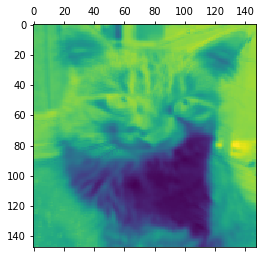

In [19]:
###Models results
plt.matshow(activation[0, :, :, 18], cmap='viridis')

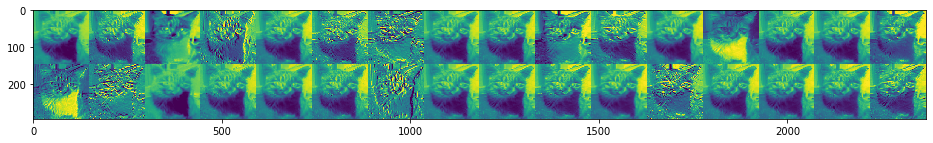

In [20]:
###Print the output of all feature cards
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

display_grid = np.zeros((n_cols * size, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [25]:
activation_model = tf.keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[3].output)

activation_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [26]:
###Run the image in the cutted model
activation = activation_model.predict(img_array)

print(activation.shape)

(1, 72, 72, 32)


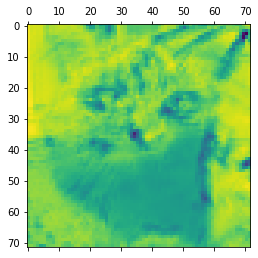

In [27]:
###Models results
plt.matshow(activation[0, :, :, 18], cmap='viridis')

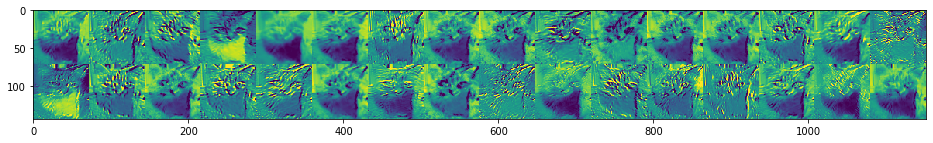

In [28]:
###Print the output of all feature cards
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

display_grid = np.zeros((n_cols * size, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [65]:
activation_model = tf.keras.models.Model(inputs=loaded_model.input, outputs=loaded_model.layers[6].output)

activation_model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0  

In [66]:
###Run the image in the cutted model
activation = activation_model.predict(img_array)

print(activation.shape)

(1, 34, 34, 64)


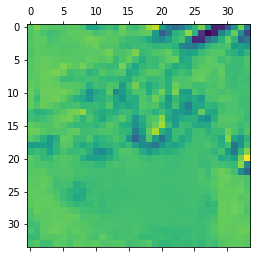

In [67]:
###Models results
plt.matshow(activation[0, :, :, 18], cmap='viridis')

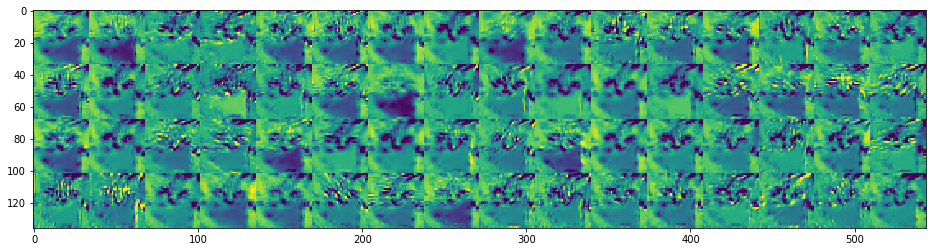

In [68]:
###Print the output of all feature cards
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

display_grid = np.zeros((n_cols * size, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')